In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv('campeonato.csv')

### Chutes Bloqueados

### O que é um chute bloqueado?

Um chute bloqueado no futebol é uma tentativa de finalização que foi bloqueada por um jogador de linha (diferente do goleiro). Geralmente, um chute bloqueado é convertido em um escanteio, um lateral ou no início de uma nova jogada para algum dos times.

OBS: Chutes para fora e chutes ao gol, se bloqueados, não são contados como chutes para fora ou chutes ao gol, apenas como chutes bloqueados.

#### Análise Geral da coluna

Nas colunas de chutes bloqueados, aproximadamente 68% dos dados totais são ausentes, logo, precisamos analisar se devemos preencher e como preencher essas colunas. 

In [14]:
bloqueados = df[['Chutes bloqueados 1', 'Chutes bloqueados 2']]
print(bloqueados.describe(),'\n')
print("Porcentagem de dados nulos =", round((1-len(bloqueados.dropna())/len(df))*100),"%")

       Chutes bloqueados 1  Chutes bloqueados 2
count          8843.000000          8843.000000
mean              2.438313             1.930001
std               1.893784             1.644897
min               0.000000             0.000000
25%               1.000000             1.000000
50%               2.000000             2.000000
75%               3.000000             3.000000
max              15.000000            12.000000 

Porcentagem de dados nulos = 68 %


Para verificar a influência dessa colunas nas outras utilizamos uma tabela de correlação

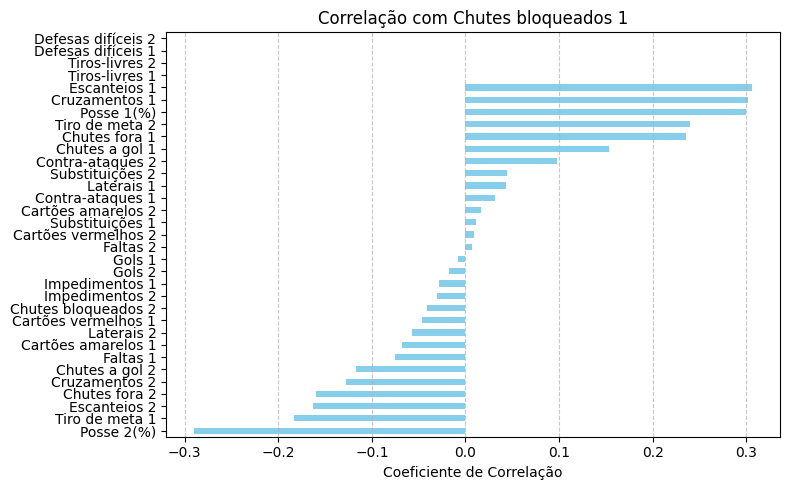

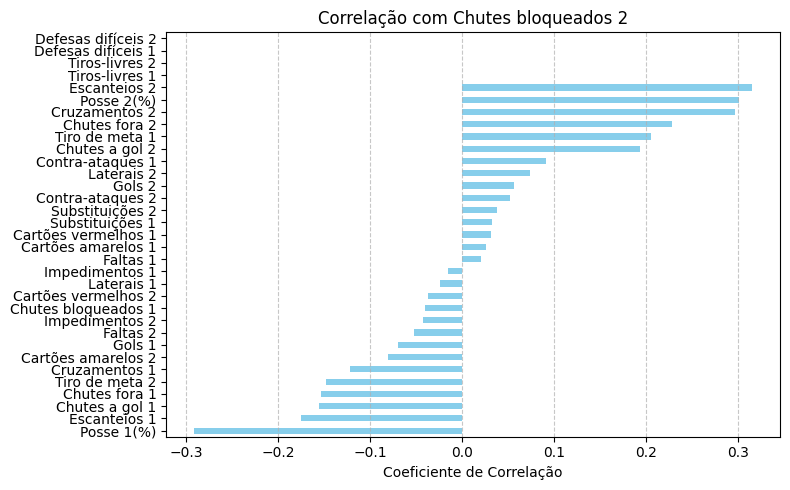

In [15]:
correlacoes1 = df.corr(numeric_only=True)["Chutes bloqueados 1"].drop("Chutes bloqueados 1")

plt.figure(figsize=(8, 5))
correlacoes1.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlação com Chutes bloqueados 1")
plt.xlabel("Coeficiente de Correlação")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

correlacoes2 = df.corr(numeric_only=True)["Chutes bloqueados 2"].drop("Chutes bloqueados 2")

plt.figure(figsize=(8, 5))
correlacoes2.sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlação com Chutes bloqueados 2")
plt.xlabel("Coeficiente de Correlação")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Olhando as correlações, percebemos que chutes bloqueados X (1 ou 2) possui uma correlação maior com Escanteios X e Posse X(%) e um correlação menor com Posse Y(%), o que representa a dominância do time X e que grande parte dos chutes bloqueados são convertidos em escanteios. OBS: Mesmo que Cruzamentos X possua uma correlação relativamente alta, essa correlação se dá principalmente pela influência dos escanteios.
 
Sendo assim, decidimos fazer uma regressão linear que usaria a coluna Escanteios X e Posse X(%) para prever os valores ausentes (Posse Y(%) foi descartada por ser 100 - Posse X(%)).

In [16]:
#REGRESSÃO PARA CHUTES BLOQUEADOS 1

teste =df[['Posse 1(%)', 'Escanteios 1', 'Posse 2(%)', 'Escanteios 2', 'Chutes bloqueados 1', 'Chutes bloqueados 2']].dropna(axis=0)

X = teste[['Posse 1(%)', 'Escanteios 1']]
Y = teste['Chutes bloqueados 1']

modelo = LinearRegression()
modelo.fit(X,Y)

a, b = modelo.coef_
c = modelo.intercept_

#IMPRIME DIFERENÇA ENTRE OS VALORES DA REGRESSÃO E O ESPERADO
teste['Chutes 1'] = a*teste['Posse 1(%)'] + b*teste['Escanteios 1'] + c
teste['Diferença 1'] = round(teste['Chutes bloqueados 1'] - teste['Chutes 1'])
teste['Diferença 1'].value_counts()

Diferença 1
-1.0     2232
 0.0     1928
-2.0     1358
 1.0     1350
 2.0      830
 3.0      418
-3.0      311
 4.0      200
 5.0       93
 6.0       44
-4.0       22
 7.0       15
 8.0        8
 9.0        3
 11.0       1
 10.0       1
 12.0       1
Name: count, dtype: int64

In [ ]:
#REGRESSÃO PARA CHUTES BLQOUEADOS 2

X = teste[['Posse 2(%)', 'Escanteios 2']]
Y = teste['Chutes bloqueados 2']

modelo = LinearRegression()
modelo.fit(X,Y)

a, b = modelo.coef_
c = modelo.intercept_

#IMPRIME DIFERENÇA ENTRE OS VALORES DA REGRESSÃO E O ESPERADO
teste['Chutes 2'] = a*teste['Posse 2(%)'] + b*teste['Escanteios 2'] + c
teste['Diferença 2'] = round(teste['Chutes bloqueados 2'] - teste['Chutes 2'])
teste['Diferença 2'].value_counts()

Diferença 2
-1.0    2428
-0.0    2310
 1.0    1409
-2.0    1196
 2.0     758
 3.0     353
 4.0     157
-3.0     107
 5.0      59
 6.0      24
 7.0       9
-4.0       3
 9.0       1
 8.0       1
Name: count, dtype: int64

Através do método de regressão, tivemos resultados inconstantes, logo, não poderíamos utilizá-la para preencher os dados nulos.

#### Conclusão

Portanto, por não conseguirmos achar uma forma consistente de preencher esses dados e, principalmente, por ser uma coluna com baixa correlação com o resultado e em que as consequências geradas (escanteios, laterais e posse) possuem menos dados faltantes, nossa decisão foi a de descartar essa coluna de nosso processo de modelagem.

In [18]:
df.drop(['Chutes bloqueados 1', 'Chutes bloqueados 2'], axis=1, inplace=True)
df.to_csv('campeonato.csv', index=False)

In [17]:
teste = df[['Chutes bloqueados 1', 'Escanteios 1', 'Chutes bloqueados 2', 'Escanteios 2', 'Posse 1(%)', 'Posse 2(%)']].dropna(axis=0)
teste['Chutes 1'] = round((teste['Escanteios 1']-1)/2)
teste['Chutes 2'] = round((teste['Escanteios 2']-1)/2)
teste['Diferença 1'] = teste['Chutes bloqueados 1'] - teste['Chutes 1']
teste['Diferença 1'].value_counts()

Diferença 1
 0.0     1822
-1.0     1653
 1.0     1515
-2.0     1102
 2.0      944
 3.0      544
-3.0      475
 4.0      277
-4.0      217
 5.0      111
-5.0       59
 6.0       42
 7.0       17
-6.0       16
 8.0        8
-7.0        4
 9.0        4
-8.0        2
 10.0       2
-9.0        1
Name: count, dtype: int64

In [9]:
teste.describe()

,Chutes bloqueados 1,Escanteios 1,Chutes bloqueados 2,Escanteios 2,Chutes 1,Chutes 2,Diferença 1
count,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000
mean,2.418031,5.735647,1.926677,4.519022,2.366382,1.751441,0.051649
std,1.842283,2.995535,1.635722,2.602214,1.534478,1.359259,2.023865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1.000000,4.000000,1.000000,3.000000,2.000000,1.000000,-1.000000
50%,2.000000,5.000000,2.000000,4.000000,2.000000,2.000000,0.000000
75%,3.000000,7.000000,3.000000,6.000000,3.000000,2.000000,1.000000
max,10.000000,20.000000,10.000000,16.000000,10.000000,8.000000,8.000000


In [42]:
df['Chutes bloqueados 1'].value_counts()

Chutes bloqueados 1
1.0     2113
2.0     1992
3.0     1471
0.0     1103
4.0      973
5.0      583
6.0      310
7.0      149
8.0       71
9.0       41
10.0      20
11.0       7
12.0       6
14.0       2
13.0       1
15.0       1
Name: count, dtype: int64